**Mon April 21, 2025 at 5:18 PM**

# Assignment: Gain Insight From The Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Cooperative Education/order-chonburi-2024-2025-raw - Sheet1.csv")
data.head()

,order_year,order_month,order_day,order_date,is_new_customer,booking_id,user_id,professional_id,service_name,is_package,...,work_hour,additional_hour,cleaning_date,total_price,code,discount,status,rating,report_problem,platform
0,2024,1,1,2024-01-01,0,240101JTCK,226565,9303,บริการทำความสะอาด,0,...,6.0,NaN,2024-01-03 10:30:00,1248.0,NaN,NaN,Success,NaN,NaN,ios
1,2024,1,1,2024-01-01,0,240101Z983,246842,6187,บริการทำความสะอาด,1,...,4.0,NaN,2024-01-05 13:00:00,936.0,NYVIP3,8.0,Success,NaN,NaN,website
2,2024,1,1,2024-01-01,0,2401016064,246842,6187,บริการทำความสะอาด,1,...,4.0,NaN,2024-01-12 13:00:00,936.0,NYVIP3,8.0,Success,NaN,NaN,website
3,2024,1,1,2024-01-01,0,2401010R79,246842,6187,บริการทำความสะอาด,1,...,4.0,NaN,2024-01-19 13:00:00,936.0,NYVIP3,8.0,Success,5.0,NaN,website
4,2024,1,1,2024-01-01,0,2401018PU4,246842,6187,บริการทำความสะอาด,1,...,4.0,NaN,2024-01-26 13:00:00,936.0,NYVIP3,8.0,Success,NaN,NaN,website


# Data Transformation

- Add Column Day Name

In [ ]:
data["order_day_name"] = pd.to_datetime(data["order_date"]).dt.day_name()

- Add Column Discounted Price

In [ ]:
data["discounted_price"] = data["total_price"] - ((data["discount"]/100)*(data["total_price"]))

- Add Column Total Work Hour

In [ ]:
data["total_work_hour"] = data["work_hour"] + data["additional_hour"]

- Add Column Additional Hour Price

In [ ]:
data["additional_hour"].unique()

array([nan, 2. , 1. , 0.5, 3. , 1.5, 2.5, 4. , 3.5])

In [ ]:
# Define the pricing structure
price_per_hour = {
    0.5: 130,
    1: 260,
    1.5: 390,
    2: 520,
    2.5: 650,
    3: 780,
    3.5: 910,
    4: 936,
    6: 1248,
    8: 1456,
}

In [ ]:
# Create a function to calculate the price based on additional hours
def calculate_additional_hour_price(additional_hours):
    return price_per_hour.get(additional_hours, np.nan)

# Apply the function to create the new column
data['additional_hour_price'] = data['additional_hour'].apply(calculate_additional_hour_price)

- Add Column Total Work Hour Price

In [ ]:
data["total_work_hour_price"] = data["total_price"] + data["additional_hour_price"]

- Log Changes

In [ ]:
print(data["discounted_price"].unique())
print(data["total_work_hour"].unique())
print(data["additional_hour"].unique())
print(data["additional_hour_price"].unique())
print(data["total_work_hour_price"].unique())

[     nan  861.12   898.56   499.2    889.2    873.6    748.8    624.
  725.4    962.55  1198.08  1185.6   1010.88  1397.76  1210.56  1166.91
  494.     979.29   483.6    741.     663.    1123.2    842.4   1060.8
  870.48   895.05   773.5    911.4    504.4   1354.08   702.     488.8
  879.84   468.       0.     450.     907.92  1173.12   442.     855.4
 1368.64   733.2   1021.41   756.6    630.5   1412.32   923.1    882.7
 1383.2    768.     617.5   1041.6    795.6    585.     989.82  1000.35
  864.5    846.3   1242.6   1155.27  1339.52   999.1    526.5    947.7
 1311.44  1237.6    604.5   1310.4   1160.64   473.2    819.     837.2
 1071.8    315.     459.    1048.5    478.4    717.6    474.3    465.
  325.5    332.5    475.    1148.16   598.     968.76   336.     455.
  591.5    280.     552.5    339.5   1107.63   814.5   1071.9    470.
  709.8   1324.96  1135.68   851.76   318.5    618.8    958.23  1223.04
 1822.5    509.6    632.4   1883.25  1397.79  1095.72  1012.35  1325.25
 3037.

# Exploratory Data Analysis (EDA)

- Validate data
- Generate hypotheses
- Identify trends
- Summarize data characteristics
- Utilize statistical and visualization techniques to bring important aspects of the data into focus

In [ ]:
null_percentage = data.isnull().sum() * 100 / len(data)
null_percentage

,0
order_year,0.000000
order_month,0.000000
order_day,0.000000
order_date,0.000000
is_new_customer,0.000000
booking_id,0.000000
user_id,0.000000
professional_id,0.000000
service_name,0.000000
is_package,0.000000


## Booking ID Count by Order Day Name

In [ ]:
data["order_day_name"].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
fig = px.histogram(data, x="order_day_name", title="Booking ID Count by Order Day Name")
fig.show()

From 2024 January to 2025 April, Monday and Friday seems to have the highest Booking Count while Sunday has the lowest Booking Count

## New Customer Acquire vs Old Customer by Each Month

In [ ]:
df = data

In [ ]:
# Convert 'order_date' to datetime objects
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract year and month
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month

# Filter data for 2024
df_2024 = df[df['order_year'] == 2024]

# Create the Plotly plot
fig = px.histogram(df_2024, x='order_month', color='is_new_customer',
                   title='New vs. Returning Customers by Month (2024)',
                   labels={'order_month': 'Order Month', 'is_new_customer': 'Customer Type', 'count':'Number of Customers'},
                   category_orders={'order_month': [1,2,3,4,5,6,7,8,9,10,11,12]})
fig.show()


พี่ต้นน้ำบอกให้ Do 100% Stacked Bar Chart Instead

In [ ]:
# Convert 'order_date' to datetime objects
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract year and month
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month

# Map is_new_customer values to labels
df_2024['customer_type'] = df_2024['is_new_customer'].map({0: 'Returning Customer', 1: 'New Customer'})

# Create the Plotly plot
fig = px.histogram(df_2024, x='order_month', color='customer_type',
                   title='New vs. Returning Customers by Month (2024)',
                   labels={'order_month': 'Order Month', 'customer_type': 'Customer Type', 'count':'Number of Customers'},
                   category_orders={'order_month': [1,2,3,4,5,6,7,8,9,10,11,12],
                                   'customer_type': ['New Customer', 'Returning Customer']}, # Specify order for legend and stacking
                   histnorm='percent')

fig.update_layout(barmode='stack')
fig.show()

<ipython-input-31-06e0769352dc>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Filter data for 2025
df_2025 = df[df['order_year'] == 2025]

# Create the Plotly plot for 2025
fig_2025 = px.histogram(df_2025, x='order_month', color='is_new_customer',
                   title='New vs. Returning Customers by Month (2025)',
                   labels={'order_month': 'Order Month', 'is_new_customer': 'Customer Type', 'count':'Number of Customers'},
                   category_orders={'order_month': [1,2,3,4]}) # Assuming data only goes up to April
fig_2025.show()


## Popular Service Each Day

In [ ]:
data["service_name"].unique()

array(['บริการทำความสะอาด', 'บริการรีดผ้า', 'บริการทำความสะอาดห้องน้ำ',
       'บริการล้างแอร์', 'บริการนวด'], dtype=object)

In [ ]:
fig = px.histogram(data, x="order_day_name", color="service_name", title="Service Name Count by Order Day Name")
fig.show()

## Most Chosen Package

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11321 entries, 0 to 11320
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_year       11321 non-null  int64  
 1   order_month      11321 non-null  int64  
 2   order_day        11321 non-null  int64  
 3   order_date       11321 non-null  object 
 4   is_new_customer  11321 non-null  int64  
 5   booking_id       11321 non-null  object 
 6   user_id          11321 non-null  int64  
 7   professional_id  11321 non-null  int64  
 8   service_name     11321 non-null  object 
 9   is_package       11321 non-null  int64  
 10  package_id       1765 non-null   Int64  
 11  subscription_id  595 non-null    float64
 12  province         11321 non-null  object 
 13  user_place_id    11321 non-null  int64  
 14  place_size       11319 non-null  object 
 15  has_pet          6899 non-null   float64
 16  admin_id         2097 non-null   float64
 17  work_hour   

In [ ]:
data['package_id'] = data['package_id'].astype('Int64')

In [ ]:
data["package_id"].unique()

<IntegerArray>
[ <NA>, 20613, 20644, 20720, 20729, 20738, 20752, 20754, 20755, 20761,
 ...
 31547, 31615, 31633, 31641, 31659, 31674, 31675, 31676, 31694, 31739]
Length: 378, dtype: Int64

In [ ]:
data["package_id"]

,package_id
0,<NA>
1,20613
2,20613
3,20613
4,20613
...,...
11316,<NA>
11317,<NA>
11318,<NA>
11319,<NA>


In [ ]:
# Top 10 list of package_id that got chosen
data['package_id'].value_counts().head(10)

,count
package_id,
29877,20
24604,17
23068,16
23800,16
22695,15
20613,15
23190,13
27568,12
28892,12


In [ ]:
top_package = data['package_id'].mode()[0]  # Get the most frequent package_id
print(f"The most chosen package ID is: {top_package}")

The most chosen package ID is: 29877


## Has Pet Count vs Use of Service

In [ ]:
# prompt: booking_id count when data["has_pet"] == 1
pet_bookings = data[data["has_pet"] == 1]
pet_booking_count = len(pet_bookings)

print(f"Number of bookings with pets: {pet_booking_count}")

Number of bookings with pets: 2427


In [ ]:
# booking_id count when data["has_pet"] == 0
no_pet_bookings = data[data["has_pet"] == 0]
no_pet_booking_count = len(no_pet_bookings)

print(f"Number of bookings without pets: {no_pet_booking_count}")

Number of bookings without pets: 4472


In [ ]:
data["has_pet"].unique()

array([ 1.,  0., nan])

data

## Status Count

In [ ]:
data["status"].unique()

array(['Success', 'Cancel', 'Paid Failed',
       'Waiting for Professional Accept', 'Waiting for Service'],
      dtype=object)

In [ ]:
fig = px.histogram(data, x="status", title="Distribution of Order Statuses")
fig.show()

- Success - ชำระเงินและได้รับบริการเรียบร้อยแล้ว
- Cancel - ชำระเงินแล้วแต่ยกเลิกบริการ
- Paid Failed - การชำระเงินล้มเหลวหรือขัดข้อง
- Waiting for Professional Accept - ชำระเงินแล้วแต่รอคุณแม่บ้านกดรับงานบริการ
- Waiting for Service - ชำระเงินแล้วแต่รอคุณแม่บ้านมาบริการ

## Rating by Report Problem
5.0 Excellent

3.0 Moderate

1.0 Bad

In [ ]:
data["report_problem"].unique()

array([nan, 'ทำความสะอาดไม่เรียบร้อย', 'คุณภาพการให้บริการต่ำกว่า 4 ดาว',
       'ทำทรัพย์สินของลูกค้าเสียหาย',
       'Checkout ก่อนเวลา / ให้บริการไม่ครบชั่วโมงการจอง', 'อื่น ๆ',
       'คืนงาน (กะทันหัน)', 'ประกันคุณภาพ / ความพึงพอใจ',
       'แนวโน้มรับงานนอก / รับเงินสด', 'ทรัพย์สิน "สูญหาย" หลังใช้บริการ',
       'รับงานแล้วไม่ไปให้บริการ / ไม่มีการแจ้งเรื่องเข้ามา (No Show)',
       'คืนงาน (ล่วงหน้า)', 'ทิ้งของโดยไม่ถามคุณลูกค้า',
       'แสดงกริยา ท่าทาง ไม่เหมาะสมขณะเข้าให้บริการ',
       'อุปกรณ์/น้ำยาทำความสะอาด', 'เข้าให้บริการสาย',
       'ขอเลื่อนเวลานัดหมายการให้บริการ', 'แอร์เสีย หลังการล้าง'],
      dtype=object)

In [ ]:
fig = px.histogram(data, x="rating", color="report_problem",
                   title="Rating Distribution by Report Problem",
                   labels={"rating": "Rating", "report_problem": "Report Problem"},
                   barmode='group') # Use 'group' to show bars side by side
fig.show()


## Frequencies of Work Hour and Additional Hour
Work Hour - จำนวนชั่วโมงที่ลูกค้าเลือกบริการทำความสะอาด

Additional Hour - การต่อเวลาชั่วโมงกรณีที่บริการไม่เสร็จใน Work Hour

In [ ]:
data["work_hour"].unique()

array([6. , 4. , 8. , 2.5, 2. , 3.5, 3. , 4.5, 1. , 5.5, 5. , 8.5, 7. ,
       0.5, 7.5, 6.5, 9.5, 1.5])

In [ ]:
data["additional_hour"].unique()

array([nan, 2. , 1. , 0.5, 3. , 1.5, 2.5, 4. , 3.5])

In [ ]:
fig = px.histogram(data, x="work_hour", title="Frequency of Work Hours")
fig.show()

In [ ]:
fig = px.histogram(data, x="additional_hour", title="Frequency of Additional Hour")
fig.show()

In [ ]:
print("Total Additional Hour Occur =", data["additional_hour"].count())

Total Additional Hour Occur = 295


## Code Usage Frequency

In [ ]:
print("Total Code Available:", data["code"].nunique())

Total Code Available: 359


In [ ]:
import plotly.express as px
fig = px.histogram(data, x="code", title="User Code Usage")
fig.show()


In [ ]:
data[data["code"] == "PACK_5"].head()

,order_year,order_month,order_day,order_date,is_new_customer,booking_id,user_id,professional_id,service_name,is_package,...,work_hour,additional_hour,cleaning_date,total_price,code,discount,status,rating,report_problem,platform
218,2024,1,6,2024-01-06,0,240106XFGG,160933,6186,บริการทำความสะอาด,1,...,3.0,NaN,2024-01-09 14:00:00,780.0,PACK_5,5.0,Success,NaN,NaN,ios
219,2024,1,6,2024-01-06,0,240106V3VS,160933,6186,บริการทำความสะอาด,1,...,3.0,NaN,2024-01-16 9:00:00,780.0,PACK_5,5.0,Success,NaN,NaN,ios
220,2024,1,6,2024-01-06,0,240106FUJ0,160933,6186,บริการทำความสะอาด,1,...,3.0,NaN,2024-01-23 14:00:00,780.0,PACK_5,5.0,Success,NaN,NaN,ios
221,2024,1,6,2024-01-06,0,240106622Y,160933,6186,บริการทำความสะอาด,1,...,3.0,NaN,2024-01-30 9:00:00,780.0,PACK_5,5.0,Success,NaN,NaN,ios
222,2024,1,6,2024-01-06,0,2401060BXA,160933,6186,บริการทำความสะอาด,1,...,3.0,NaN,2024-02-13 9:00:00,780.0,PACK_5,5.0,Success,NaN,NaN,ios


## Customer Booking Usage From Platforms

In [ ]:
fig = px.pie(data, names="platform", title="Platform Distribution")
fig.show()


- ลองทำเป็น Bar Chart

In [ ]:
fig = px.bar(data, x="platform", title="Platform Distribution", color="platform")
fig.update_traces(marker_color=px.colors.qualitative.Plotly,  # Use a different color palette if desired
                  marker_line_color='rgb(8,48,107)',            # Set bar border color
                  marker_line_width=1.5,                       # Set bar border width
                  opacity=1)                                  # Set opacity to 1 for solid colors
fig.show()

# Prediction
Try using stat-based model or machine learning model to predict the trends of booking or anything of my interest.

Okay, here's a list of machine learning and statistical models that could potentially be used to make predictions on the data in your notebook, along with the reasoning behind each suggestion:

## Machine Learning Models

**Linear Regression:**

Reasoning: Can be used to predict continuous target variables, such as the total_price or discounted_price, based on features like work_hour, additional_hour, or has_pet.
Type: Supervised, Regression

**Logistic Regression:**

Reasoning: Suitable for predicting categorical target variables, such as is_new_customer or status (if converted to a binary classification problem), based on features like order_day_name or platform.
Type: Supervised, Classification

**Decision Tree:**

Reasoning: Can handle both continuous and categorical features to predict target variables like service_name or package_id. It provides interpretable rules for prediction.
Type: Supervised, Classification/Regression

**Random Forest:**

Reasoning: An ensemble of decision trees, often improving prediction accuracy compared to a single decision tree. Can be used for similar tasks as Decision Trees.
Type: Supervised, Classification/Regression

**K-Nearest Neighbors (KNN):**

Reasoning: Can predict the class or value of a data point based on the characteristics of its nearest neighbors. Could be used for tasks like predicting service_name or package_id.
Type: Supervised, Classification/Regression

## Statistical Models

**Time Series Analysis:**

Reasoning: Relevant for analyzing trends and patterns in data collected over time, such as the number of bookings per day or month (order_date). Can help predict future booking volumes.
Type: Statistical, Forecasting

**Regression Models (Linear, Logistic, etc.):**

Reasoning: Similar to their machine learning counterparts, statistical regression models can be used to establish relationships between variables and make predictions.
Type: Statistical, Regression/Classification
Considerations:

Data Preprocessing: Before applying these models, you'll likely need to preprocess your data, which might involve handling missing values, encoding categorical features, and scaling numerical features.
Model Selection: The choice of model will depend on the specific prediction task and the characteristics of your data. Experimenting with different models and evaluating their performance is crucial.
Evaluation Metrics: Use appropriate metrics to assess the accuracy and performance of your chosen model. For regression tasks, metrics like Mean Squared Error (MSE) or R-squared can be used. For classification, metrics like accuracy, precision, and recall are relevant.
I hope this list gives you a good starting point for your prediction tasks. Let me know if you have any other questions.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Cooperative Education/order-chonburi-2024-2025-raw - Sheet1.csv")
data.head()

,order_year,order_month,order_day,order_date,is_new_customer,booking_id,user_id,professional_id,service_name,is_package,...,work_hour,additional_hour,cleaning_date,total_price,code,discount,status,rating,report_problem,platform
0,2024,1,1,2024-01-01,0,240101JTCK,226565,9303,บริการทำความสะอาด,0,...,6.0,NaN,2024-01-03 10:30:00,1248.0,NaN,NaN,Success,NaN,NaN,ios
1,2024,1,1,2024-01-01,0,240101Z983,246842,6187,บริการทำความสะอาด,1,...,4.0,NaN,2024-01-05 13:00:00,936.0,NYVIP3,8.0,Success,NaN,NaN,website
2,2024,1,1,2024-01-01,0,2401016064,246842,6187,บริการทำความสะอาด,1,...,4.0,NaN,2024-01-12 13:00:00,936.0,NYVIP3,8.0,Success,NaN,NaN,website
3,2024,1,1,2024-01-01,0,2401010R79,246842,6187,บริการทำความสะอาด,1,...,4.0,NaN,2024-01-19 13:00:00,936.0,NYVIP3,8.0,Success,5.0,NaN,website
4,2024,1,1,2024-01-01,0,2401018PU4,246842,6187,บริการทำความสะอาด,1,...,4.0,NaN,2024-01-26 13:00:00,936.0,NYVIP3,8.0,Success,NaN,NaN,website


bold text# Linear Regression
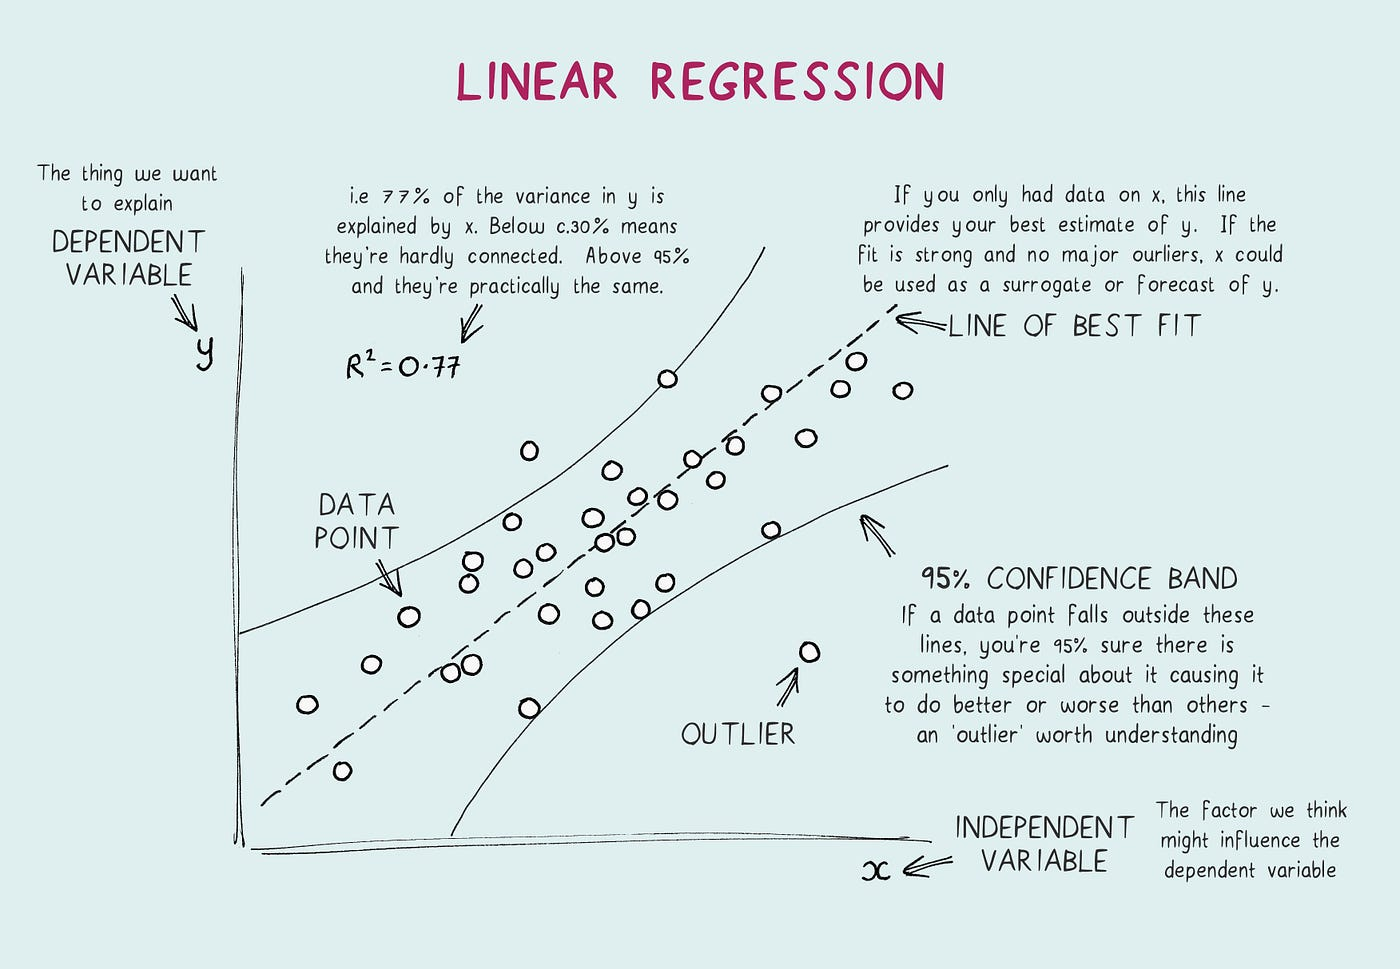

Let's do Linear Regression of Booking prediction in the next 3 month (May 2025 - July 2025) with the data

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Convert order_date to datetime objects
data['order_date'] = pd.to_datetime(data['order_date'])

# Extract year and month
data['order_year'] = data['order_date'].dt.year
data['order_month'] = data['order_date'].dt.month

# Create a new column for total bookings per month
monthly_bookings = data.groupby(['order_year', 'order_month'])['booking_id'].count().reset_index()
monthly_bookings.rename(columns={'booking_id': 'total_bookings'}, inplace=True)

# Merge the monthly bookings back into the original data
data = pd.merge(data, monthly_bookings, on=['order_year', 'order_month'], how='left')

# Select features and target variable
X = data[['order_year', 'order_month']]  # Features
y = data['total_bookings']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)